In [1]:
import matplotlib

%matplotlib inline
matplotlib.style.use("ggplot")
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

import matplotlib.pyplot as plt
import numpy
# import pyvista as pv

In [2]:
def calc_positions(L, row):
    x = numpy.arange(-L / 2, L / 2, L / row)
    y = numpy.arange(-L / 2, L / 2, L / row) * numpy.sqrt(3) / 2
    X, Y = numpy.meshgrid(x, y)

    X[1::2, :] += 0.75
    X[::2, :] += 0.25

    Y[:] += numpy.sqrt(3) / 4

    return numpy.column_stack([X.flatten(), Y.flatten(), numpy.zeros(row * row)])


def calc_tri(N, row):
    v_index = numpy.arange(N)
    vr_index = v_index + 1
    vr_index[row - 1 :: row] -= row
    e_index = numpy.repeat(v_index, 2).reshape(-1, 2)
    e_index[:, 0] += row
    e_index[:, 1] -= row
    e_index = e_index.reshape(row, -1, 2)
    e_index[1::2] += 1
    e_index[1::2, -1] -= row
    e_index = e_index.reshape(-1) % N
    v_index = numpy.repeat(v_index, 2)
    vr_index = numpy.repeat(vr_index, 2)
    vr_index[1::2] = e_index[1::2]
    e_index[1::2] = vr_index[0::2]

    return numpy.column_stack([v_index, vr_index, e_index, v_index])

[[-4.75       -3.89711432  0.        ]
 [-3.75       -3.89711432  0.        ]
 [-2.75       -3.89711432  0.        ]
 [-1.75       -3.89711432  0.        ]
 [-0.75       -3.89711432  0.        ]
 [ 0.25       -3.89711432  0.        ]
 [ 1.25       -3.89711432  0.        ]
 [ 2.25       -3.89711432  0.        ]
 [ 3.25       -3.89711432  0.        ]
 [ 4.25       -3.89711432  0.        ]
 [-4.25       -3.03108891  0.        ]
 [-3.25       -3.03108891  0.        ]
 [-2.25       -3.03108891  0.        ]
 [-1.25       -3.03108891  0.        ]
 [-0.25       -3.03108891  0.        ]
 [ 0.75       -3.03108891  0.        ]
 [ 1.75       -3.03108891  0.        ]
 [ 2.75       -3.03108891  0.        ]
 [ 3.75       -3.03108891  0.        ]
 [ 4.75       -3.03108891  0.        ]
 [-4.75       -2.16506351  0.        ]
 [-3.75       -2.16506351  0.        ]
 [-2.75       -2.16506351  0.        ]
 [-1.75       -2.16506351  0.        ]
 [-0.75       -2.16506351  0.        ]
 [ 0.25       -2.16506351

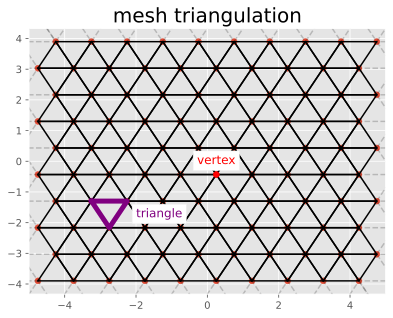

In [3]:
# box size
L = 10

# Number of vertices per row
row = 10

# Number of vertices
N = row * row

vertex_positions = calc_positions(L, row)

triangles_vis = calc_tri(N, row)


plt.scatter(vertex_positions[:, 0], vertex_positions[:, 1])

for tr_pos in vertex_positions[triangles_vis[:18:2]]:
    plt.plot(tr_pos[:, 0], tr_pos[:, 1], color="black")

for i in range(1, 9):
    for tr_pos in vertex_positions[triangles_vis[i * 20 : (i + 1) * 20 - 2]]:
        plt.plot(tr_pos[:, 0], tr_pos[:, 1], color="black")

for tr_pos in vertex_positions[triangles_vis[181:199:2]]:
    plt.plot(tr_pos[:, 0], tr_pos[:, 1], color="black")

plt.text(
    0.25,
    0.45 - numpy.sqrt(3) / 4,
    "vertex",
    fontsize=12,
    bbox=dict(facecolor="white"),
    color="red",
    ha="center",
    va="center",
)
plt.scatter(0.25, -numpy.sqrt(3) / 4, color="red", zorder=10)

for tr_pos in vertex_positions[triangles_vis[63:64]]:
    plt.plot(tr_pos[:, 0], tr_pos[:, 1], color="purple", lw=5)

plt.text(
    -1.35,
    -2.15 + numpy.sqrt(3) / 4,
    "triangle",
    fontsize=12,
    bbox=dict(facecolor="white"),
    color="purple",
    ha="center",
    va="center",
)

plt.title("mesh triangulation", fontsize=20, color="black")

L += 4
row += 4

N = row * row

print(vertex_positions)


vertex_positions = calc_positions(L, row)

triangles_vis = calc_tri(N, row)


for i in [1, row - 2]:
    for tr_pos in vertex_positions[triangles_vis[i * 2 * row : (i + 1) * 2 * row - 2]]:
        plt.plot(tr_pos[:, 0], tr_pos[:, 1], "--", color="black", alpha=0.2)

for i in range(2, row - 2):
    for tr_pos in vertex_positions[triangles_vis[i * 2 * row : i * 2 * row + 3]]:
        plt.plot(tr_pos[:, 0], tr_pos[:, 1], "--", color="black", alpha=0.2)
    for tr_pos in vertex_positions[
        triangles_vis[(i + 1) * 2 * row - 5 : (i + 1) * 2 * row - 2]
    ]:
        plt.plot(tr_pos[:, 0], tr_pos[:, 1], "--", color="black", alpha=0.2)

plt.xlim(-5, 5)
plt.ylim(-5 * numpy.sqrt(3) / 2, 5 * numpy.sqrt(3) / 2)
plt.savefig("2D_triangulation.svg")

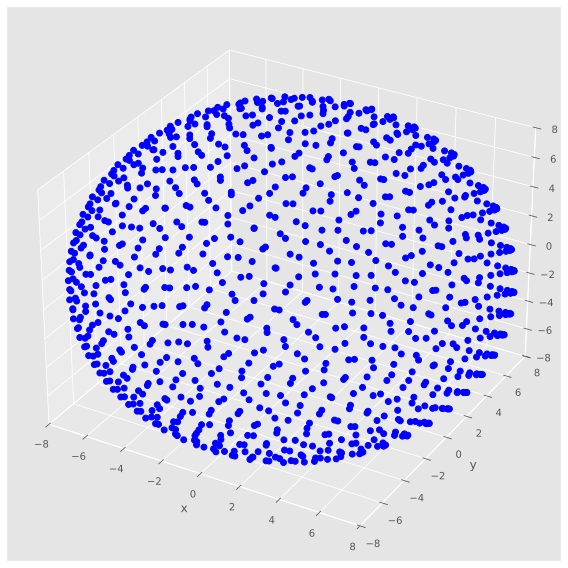

In [4]:
# Number of points on the sphere
num_pts = 1000

# Radius of the sphere
R = 10

# Fibonacci algorithm
indices = numpy.arange(0, num_pts, dtype=float) + 0.5

phi = numpy.arccos(1 - 2 * indices / num_pts)
theta = numpy.pi * (1 + 5**0.5) * indices

x, y, z = (
    R * numpy.cos(theta) * numpy.sin(phi),
    R * numpy.sin(theta) * numpy.sin(phi),
    R * numpy.cos(phi),
)

vertex_positions = numpy.column_stack((x, y, z))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

ax.plot(x, y, z, "bo")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim3d(-8, 8)
ax.set_ylim3d(-8, 8)
ax.set_zlim3d(-8, 8)

plt.savefig("sphere_decoration.svg")

In [5]:
# Uncomment this code to regenerate the figure (requires pyvista)
# mesh = pv.PolyData(vertex_positions)

# Delaunay triangulation and surface extraction:
# triangulated = mesh.delaunay_3d()
# surface = triangulated.extract_geometry()

# plotter = pv.Plotter()
# plotter.add_mesh(surface, color='white', show_edges=True)
# plotter.add_points(vertex_positions, color='red', point_size=5)
# plotter.show()

# plotter.save_graphic("sphere_triangulation.svg")

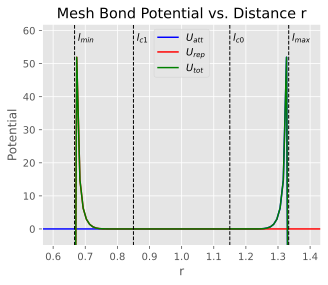

In [6]:
sigma = 1

l_min = (2 / 3) * sigma
l_c1 = 0.85 * sigma
l_c0 = 1.15 * sigma
l_max = (4 / 3) * sigma
k_bond = 100


def find_u_bond(r):
    if r > l_c0:
        U_att = (k_bond * numpy.exp(1 / (l_c0 - r))) / (l_max - r)
    elif r <= l_c0:
        U_att = 0

    if r < l_c1:
        U_rep = (k_bond * numpy.exp(1 / (r - l_c1))) / (r - l_min)
    elif r >= l_c1:
        U_rep = 0

    U_tot = U_att + U_rep

    return (U_att, U_rep, U_tot)


def plottable_energies():
    r_values = numpy.linspace(0, 2, 200)

    U_att_values = []
    U_rep_values = []
    U_tot_values = []
    for r in r_values:
        U_att, U_rep, U_tot = find_u_bond(r)
        U_att_values.append(U_att)
        U_rep_values.append(U_rep)
        U_tot_values.append(U_tot)

    return (r_values, U_att_values, U_rep_values, U_tot_values)


def plot_energies():
    plt.figure(figsize=(5, 4))
    plt.plot(r_values, U_att_values, label="$U_{att}$", color="blue")
    plt.plot(r_values, U_rep_values, label="$U_{rep}$", color="red")
    plt.plot(r_values, U_tot_values, label="$U_{tot}$", color="green")
    plt.xlabel("r")
    plt.ylabel("Potential")
    plt.title("Mesh Bond Potential vs. Distance r")
    plt.legend()
    # plt.gca().set_facecolor("white")
    # plt.grid(True, color="lightgrey", linestyle=":")
    plt.axvline(x=l_min, color="black", linestyle="--", linewidth=1, label="l_min")
    plt.axvline(x=l_max, color="black", linestyle="--", linewidth=1, label="l_max")
    plt.text(l_max + 0.01, max(U_tot_values) + 5, "$l_{max}$")
    plt.text(l_min + 0.01, max(U_tot_values) + 5, "$l_{min}$")
    plt.axvline(x=l_c0, color="black", linestyle="--", linewidth=1, label="l_min")
    plt.axvline(x=l_c1, color="black", linestyle="--", linewidth=1, label="l_max")
    plt.text(l_c0 + 0.01, max(U_tot_values) + 5, "$l_{c0}$")
    plt.text(l_c1 + 0.01, max(U_tot_values) + 5, "$l_{c1}$")
    plt.xlim(l_min - 0.1, l_max + 0.1)
    plt.ylim(-5, max(U_tot_values) + 10)
    plt.savefig("Helfrich_plot.svg")


r_values, U_att_values, U_rep_values, U_tot_values = plottable_energies()
plot_energies()